In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
[Source](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
## Attribute Information:
    -- 1.age: age in years 
    -- 2.sex: sex (1 = male; 0 = female) 
    -- 3.cp: chest pain type
        ^ Value 1: typical angina
        ^ Value 2: atypical angina
        ^ Value 3: non-anginal pain
        ^ Value 4: asymptomatic 
    -- 4.trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
    -- 5.chol: serum cholestoral in mg/dl 
    -- 6.fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    -- 7.restecg: resting electrocardiographic results
        ^ Value 0: normal
        ^ Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        ^ Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    -- 8.thalach: maximum heart rate achieved 
    -- 9.exang: exercise induced angina (1 = yes; 0 = no) 
    -- 10.oldpeak: ST depression induced by exercise relative to rest 
    -- 11.slope: the slope of the peak exercise ST segment
        ^ Value 1: upsloping
        ^ Value 2: flat
        ^ Value 3: downsloping 
    -- 12.ca: number of major vessels (0-3) colored by flourosopy 
    -- 13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
    -- 14.the predicted attribute: diagnosis of heart disease (angiographic disease status)
        ^ Value 0: < 50% diameter narrowing
        ^ Value 1: > 50% diameter narrowing 

In [2]:
binary = pd.CategoricalDtype(categories=[0, 1])
df = pd.read_csv(
    'processed.cleveland.data',
    header=None,
    na_values='?',
    names='age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target'.split(', '),
    dtype={
        'sex':binary,
        'cp':pd.CategoricalDtype(categories=range(1,5)),
        'fbs':binary,
        'restecg':pd.CategoricalDtype(categories=range(3)),
        'exang':binary,
        'slope':pd.CategoricalDtype(categories=range(1,4)),
        'ca':pd.CategoricalDtype(categories=range(4)),
        'thal':pd.CategoricalDtype(categories=[3,6,7]),
        'target':pd.CategoricalDtype(categories=range(2), ordered=True),
    }
)

In [3]:
df.target.value_counts()

0    164
1     55
Name: target, dtype: int64

In [4]:
df_f = df.fillna({'ca':0, 'thal':3, 'target':1})

In [5]:
df_f.target.value_counts()

0    164
1    139
Name: target, dtype: int64

In [6]:
mas = df.dtypes == 'category'
df.columns[mas][:-1]

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')

In [7]:
dum = pd.get_dummies(df_f, columns=df.columns[mas][:-1], drop_first=False)

In [31]:
dum

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,110.0,264.0,132.0,1.2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,141.0,3.4,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,115.0,1.2,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57.0,130.0,236.0,174.0,0.0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


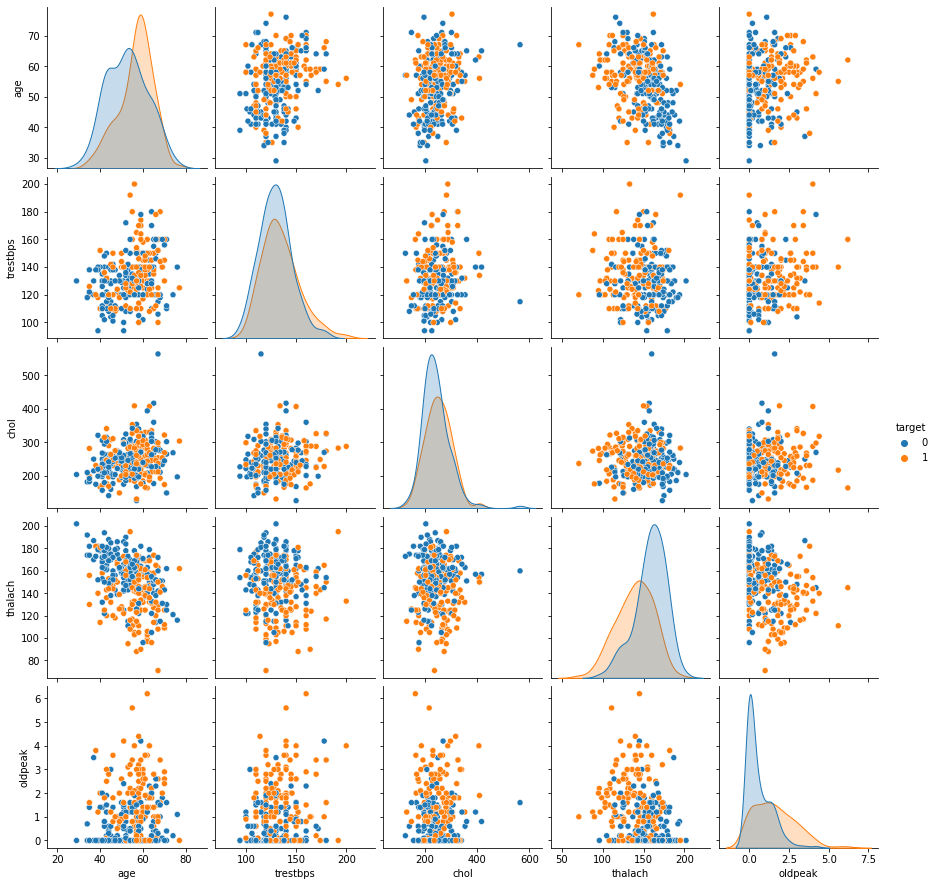

In [9]:
sns.pairplot(data=df_f, hue='target')

# Modeling

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [11]:
X = dum.drop('target', axis=1)
y = dum['target']

In [12]:
sclra = StandardScaler()
X_norm = sclra.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=43, random_state=42)
sclr = StandardScaler()
x_train_norm = sclr.fit_transform(x_train)
x_test_norm = sclr.transform(x_test)
x_train.shape, x_test.shape

((260, 28), (43, 28))

In [13]:
def runall(model):
    model.fit(X_norm, y)
    y_pred = model.predict(X_norm)
    print(
        classification_report(y, y_pred, zero_division=0)
    )
    
def runsplit(model):
    model.fit(x_train_norm, y_train)
    y_pred = model.predict(x_test_norm)
    print(
        classification_report(y_test, y_pred, zero_division=0)
    )
def plotpr(model):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 7))
    name=str(model).split('(',1)[0]
    y_pred = model.predict_proba(x_test_norm)[:, 1]
    PrecisionRecallDisplay.from_predictions(
        y_test, y_pred, ax=ax1, name=f'PrecisionRecall for {name}')
    RocCurveDisplay.from_predictions(
        y_test, y_pred, ax=ax2,  name=f'RocCurve for {name}')
    plt.show()
    
def run(model):
    print('Split mode:')
    runsplit(model)
    plotpr(model)
    print('All mode:')
    runall(model)
    plotpr(model)


Split mode:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.82      0.90      0.86        20

    accuracy                           0.86        43
   macro avg       0.86      0.86      0.86        43
weighted avg       0.86      0.86      0.86        43



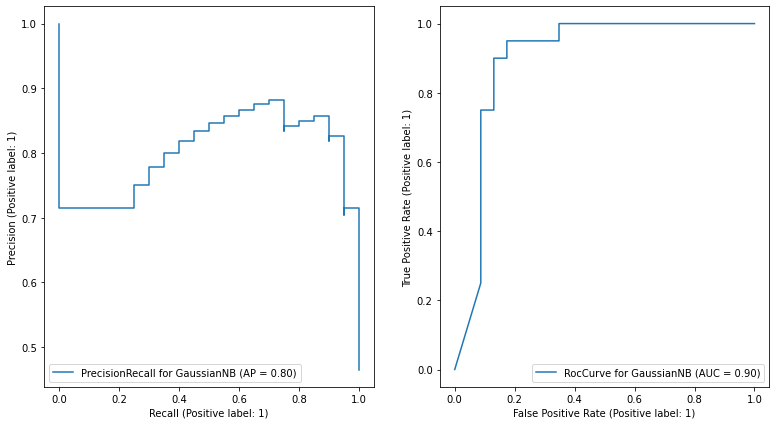

All mode:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       164
           1       0.86      0.79      0.82       139

    accuracy                           0.84       303
   macro avg       0.85      0.84      0.84       303
weighted avg       0.85      0.84      0.84       303



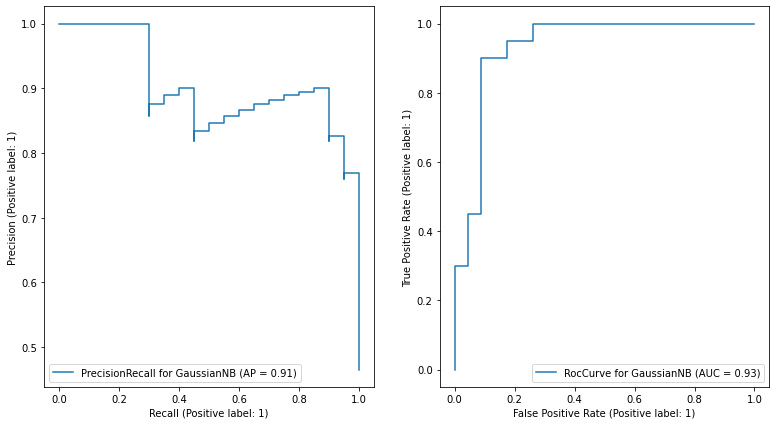

In [14]:
nb = GaussianNB()
run(nb)


Split mode:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.77      0.85      0.81        20

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.81        43
weighted avg       0.82      0.81      0.81        43



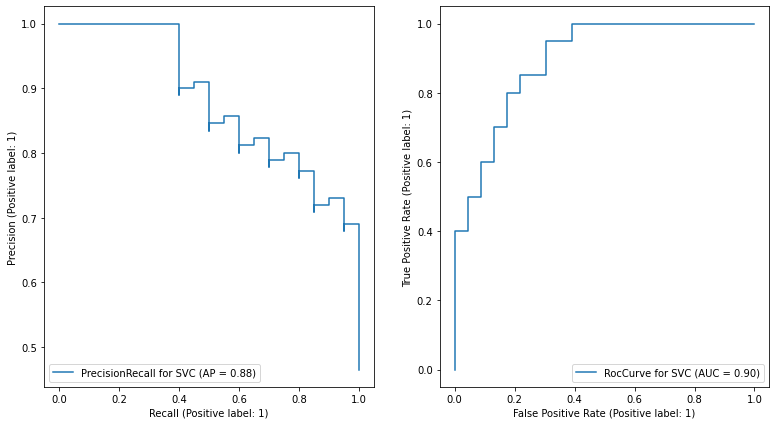

All mode:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       164
           1       0.96      0.92      0.94       139

    accuracy                           0.94       303
   macro avg       0.95      0.94      0.94       303
weighted avg       0.94      0.94      0.94       303



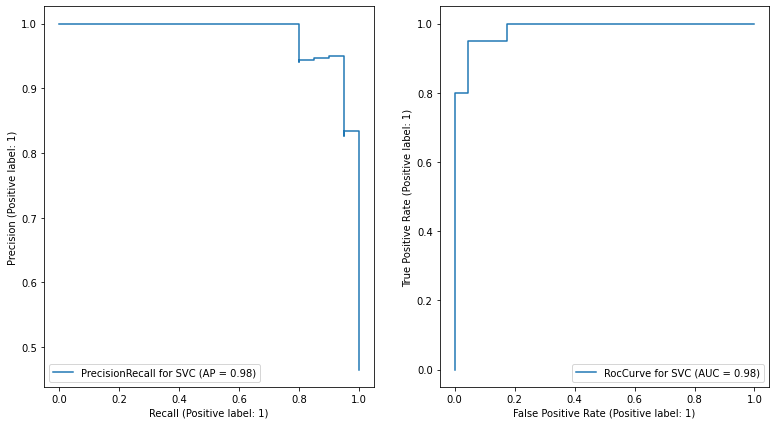

In [15]:
svc = SVC(class_weight='balanced', probability=True)
run(svc)

Split mode:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.76      0.80      0.78        20

    accuracy                           0.79        43
   macro avg       0.79      0.79      0.79        43
weighted avg       0.79      0.79      0.79        43



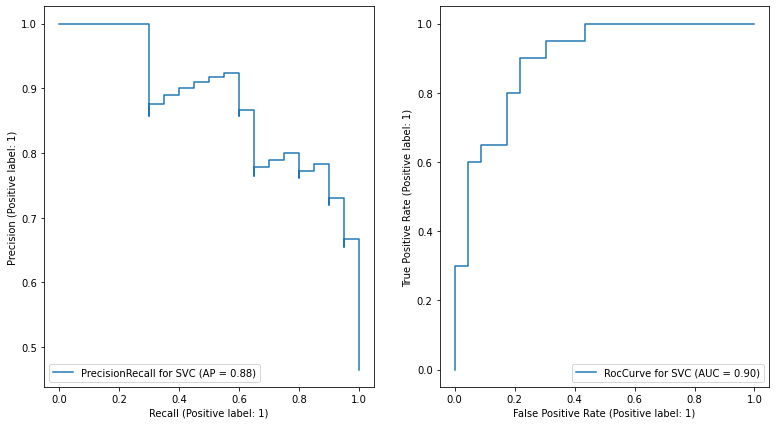

All mode:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       164
           1       0.84      0.77      0.80       139

    accuracy                           0.83       303
   macro avg       0.83      0.82      0.83       303
weighted avg       0.83      0.83      0.83       303



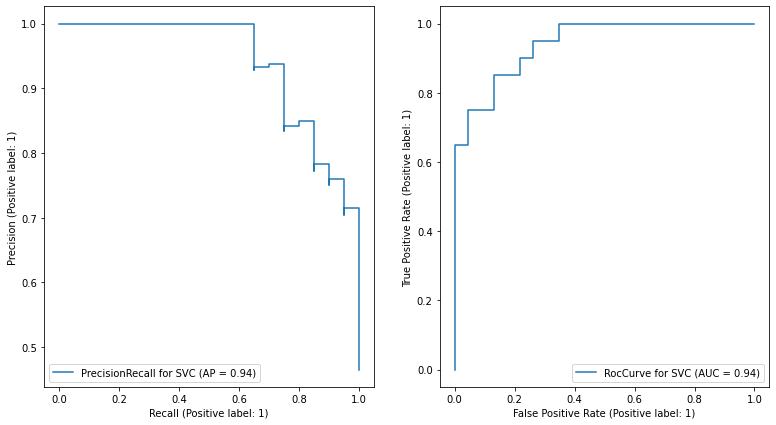

In [16]:
svc = SVC(kernel='sigmoid', class_weight='balanced', probability=True)
run(svc)

Split mode:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.79      0.75      0.77        20

    accuracy                           0.79        43
   macro avg       0.79      0.79      0.79        43
weighted avg       0.79      0.79      0.79        43



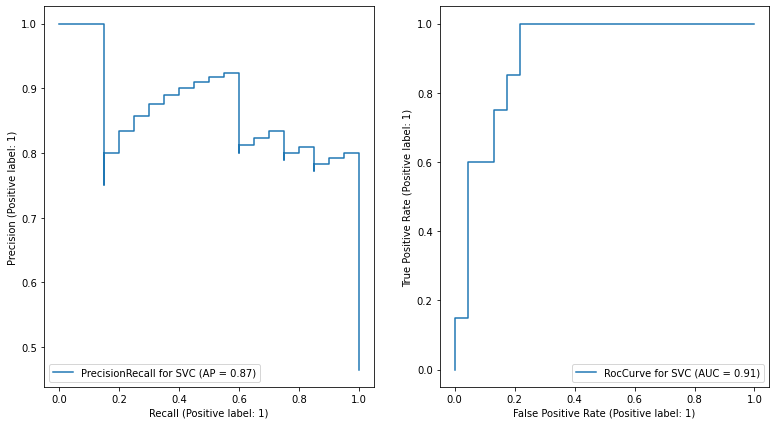

All mode:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       164
           1       0.96      0.91      0.94       139

    accuracy                           0.94       303
   macro avg       0.95      0.94      0.94       303
weighted avg       0.94      0.94      0.94       303



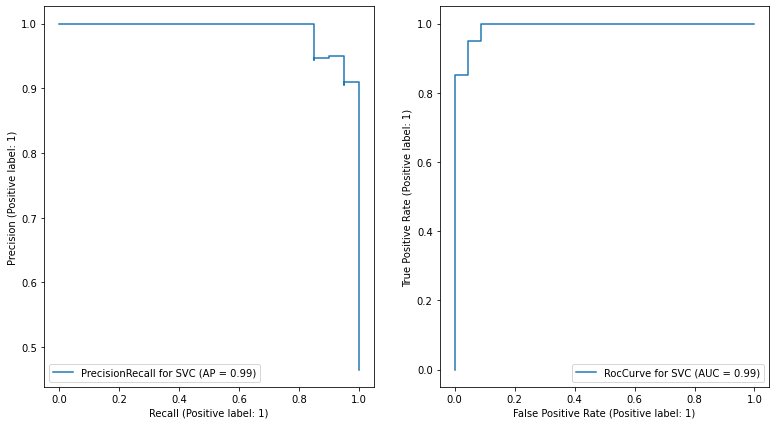

In [17]:
svc = SVC(kernel='poly', class_weight='balanced', probability=True)
run(svc)

Split mode:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.82      0.90      0.86        20

    accuracy                           0.86        43
   macro avg       0.86      0.86      0.86        43
weighted avg       0.86      0.86      0.86        43



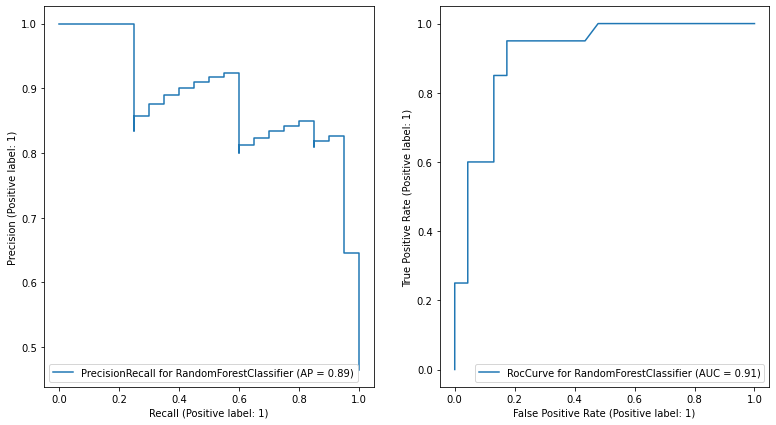

All mode:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       164
           1       1.00      0.99      1.00       139

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



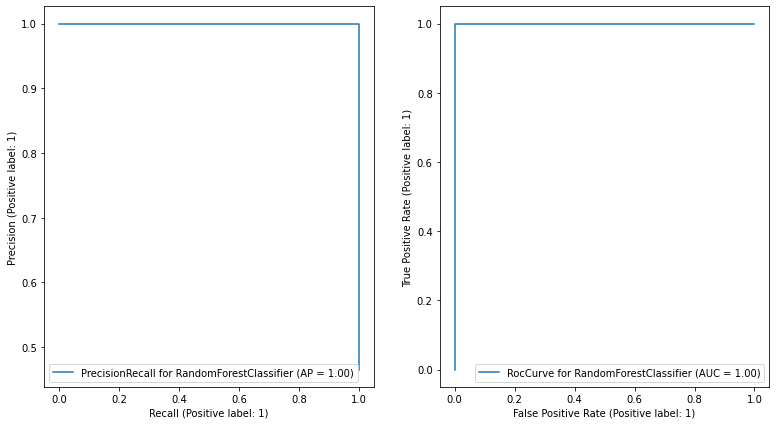

In [18]:
rf = RandomForestClassifier()
run(rf)

Split mode:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.86      0.90      0.88        20

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.88      0.88      0.88        43



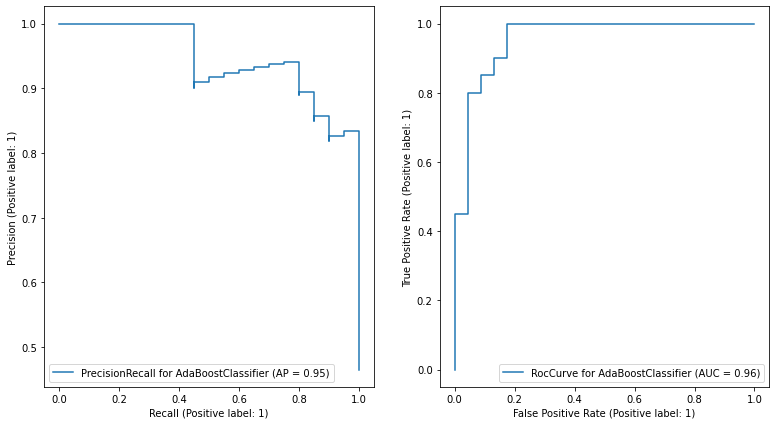

All mode:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       164
           1       0.91      0.89      0.90       139

    accuracy                           0.91       303
   macro avg       0.91      0.91      0.91       303
weighted avg       0.91      0.91      0.91       303



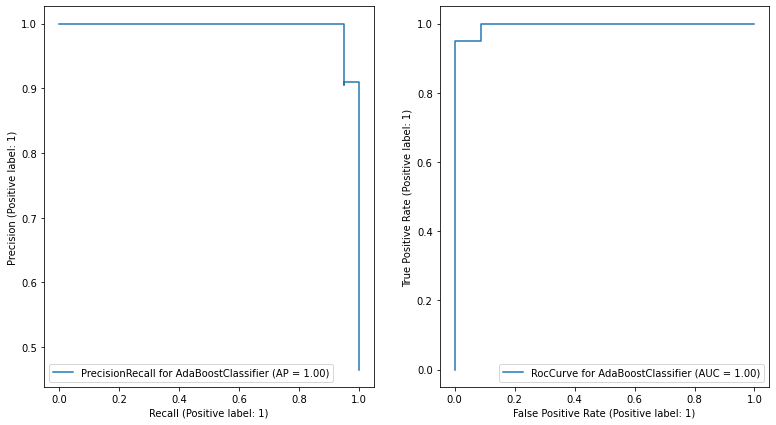

In [19]:
ada = AdaBoostClassifier()
run(ada)

Split mode:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.81      0.85      0.83        20

    accuracy                           0.84        43
   macro avg       0.84      0.84      0.84        43
weighted avg       0.84      0.84      0.84        43



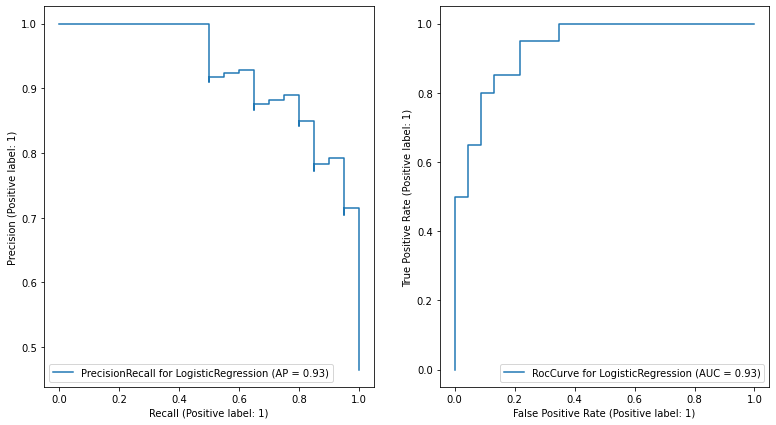

All mode:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       164
           1       0.88      0.82      0.85       139

    accuracy                           0.87       303
   macro avg       0.87      0.86      0.87       303
weighted avg       0.87      0.87      0.87       303



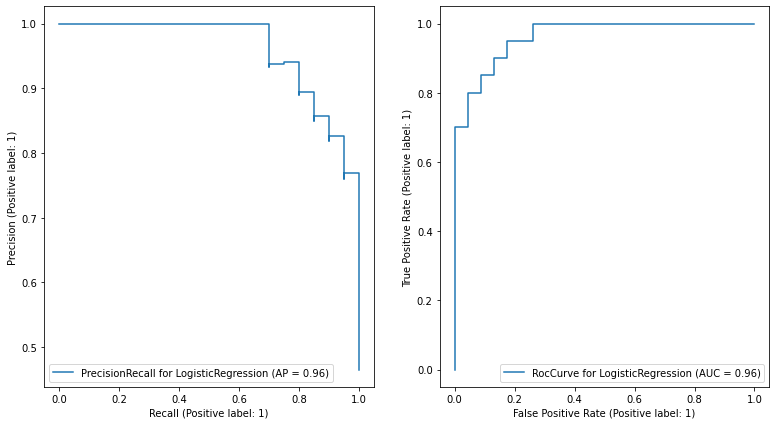

In [20]:
lg = LogisticRegression(solver='saga', penalty='elasticnet', C=0.3, l1_ratio=0.8, max_iter=1000)
run(lg)

In [32]:
nb.predict_proba(X_norm)

array([[4.04642352e-03, 9.95953576e-01],
       [1.93474134e-15, 1.00000000e+00],
       [6.53345250e-12, 1.00000000e+00],
       [9.95628378e-01, 4.37162220e-03],
       [9.99999999e-01, 9.75147403e-10],
       [9.99999981e-01, 1.85163004e-08],
       [1.30227968e-06, 9.99998698e-01],
       [9.98027804e-01, 1.97219602e-03],
       [1.18554513e-04, 9.99881445e-01],
       [1.23836751e-07, 9.99999876e-01],
       [2.10638712e-03, 9.97893613e-01],
       [9.99999669e-01, 3.30914150e-07],
       [4.38591187e-07, 9.99999561e-01],
       [9.99997682e-01, 2.31818099e-06],
       [9.98779518e-01, 1.22048191e-03],
       [9.99998687e-01, 1.31272612e-06],
       [9.98938557e-01, 1.06144286e-03],
       [9.99648750e-01, 3.51249710e-04],
       [9.99999983e-01, 1.72256450e-08],
       [9.99999985e-01, 1.49720097e-08],
       [9.45738659e-01, 5.42613408e-02],
       [9.99999955e-01, 4.48610384e-08],
       [9.99979417e-01, 2.05827712e-05],
       [4.60000452e-05, 9.99954000e-01],
       [1.431172

In [35]:
nb_res = pd.DataFrame([nb.predict_proba(X_norm)[:,1], nb.predict(X_norm), y], index=['Prob','predict', 'Label']).T

In [36]:
nb_res

,Prob,predict,Label
0,9.959536e-01,1.0,0.0
1,1.000000e+00,1.0,1.0
2,1.000000e+00,1.0,1.0
3,4.371622e-03,0.0,0.0
4,9.751474e-10,0.0,0.0
...,...,...,...
298,2.818641e-03,0.0,1.0
299,1.000000e+00,1.0,1.0
300,9.999996e-01,1.0,1.0
301,9.710270e-06,0.0,1.0


In [40]:
nb_res[nb_res['predict'] != nb_res['Label']]

,Prob,predict,Label
0,9.959536e-01,1.0,0.0
10,9.978936e-01,1.0,0.0
16,1.061443e-03,0.0,1.0
22,2.058277e-05,0.0,1.0
32,8.893165e-07,0.0,1.0
33,7.098174e-01,1.0,0.0
44,1.306367e-05,0.0,1.0
52,5.662307e-02,0.0,1.0
56,4.913288e-01,0.0,1.0
57,3.779003e-02,0.0,1.0
